# Exercise: Download and Plot CMIP6 Data

![description](images/ExerciseDescription.png)

## 1) Get CMIP6 Data

The official archive for CMIP6 outputs is ESGF. Some data are also available on AWS and Google Cloud. This notebook shows the search parameters on ESGF that yield the 2 files for the exercise. For bulk downloads from ESGF you should get a free user account. For this exercise, you can simply click the files to download them manually.

In the US, we can access the ESGF site through the Lawrence Livermore National Lab (LLNL) node https://aims2.llnl.gov/search

Use the following filters:

- Identifiers
    - Experiment ID: historical, ssp245
    - Source ID: ACCESS-ESM1-5
- Labels
    - Variant Label: r1i1p1f1
- Classifications
    - Frequency: mon
    - Variable ID: pr

<table>
  <tr>
    <td><img src="images/identifiers.png" width="300"/></td>
    <td><img src="images/LabelsClassifications.png" width="300"/></td>
  </tr>
</table>

In the search results, you'll probably see more than two files. Actually though, you're seeing duplicates of only 2 files. Select one of each file from the results OR you can use an additional filter to show only the files held at a single data center (e.g. choose filter General > Data Node > esgf-data1.llnl.gov) which should yield only two search results.

![datanodefilter](images/Datanode.png)

Next, in your search results select the check box next to each file and click Add Selected to Cart. Then view your cart by clicking on the cart icon. Manually download each file by first expanding the info for each file, then clicking the download icon for each file.

![cart](images/CartDownload.png)

## 2) Plot 100-yr mean precipitation from model historical experiment


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import dask

In [2]:
# CMIP6 data for the model ACCESS-ESM1-5, ensemble member r1i1p1f1
# data files should be located in the same directory as this notebook

# historical experiment
h_file = 'pr_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc'

# scenarioMIP projection
f_file = 'pr_Amon_ACCESS-ESM1-5_ssp245_r1i1p1f1_gn_201501-210012.nc'

In [3]:
year_start = '1915'
year_end = '2014'

In [4]:
ds = xr.open_dataset(h_file)
ds

<xarray.Dataset> Size: 221MB
Dimensions:    (time: 1980, bnds: 2, lat: 145, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 16kB 1850-01-16T12:00:00 ... 2014-12-16T...
  * lat        (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon        (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 32kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    pr         (time, lat, lon) float32 220MB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  21915.0
    creation_date:          2019-11-15T04:32:57Z
    ...                     ...
    variable_id:            pr
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/e1bc1d0d-54d8-4a7f-adae-d3f6324a2366
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [5]:
# pull pr data array from dataset object
pr = ds.pr

# select only augusts over the 100 year time period
pr = pr.sel(time=pr.time.dt.month==8).sel(time=slice(year_start,year_end))
pr

<xarray.DataArray 'pr' (time: 100, lat: 145, lon: 192)> Size: 11MB
[2784000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 800B 1915-08-16T12:00:00 ... 2014-08-16T12...
  * lat      (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon      (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:  precipitation_flux
    long_name:      Precipitation
    comment:        includes both liquid and solid phases
    units:          kg m-2 s-1
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-11-15T04:32:56Z altered by CMOR: replaced missing va...

Units Conversion using the density of water

$$
\frac{kg}{m^{2}s} * \frac{m^{3}}{1000 kg} * \frac{1000mm}{m} * \frac{86400s}{day}
$$

In [6]:
# convert units, update metadata
pr_mean = pr.mean('time')*86400.
pr_mean.attrs['units'] = 'mm/day'
pr_mean

<xarray.DataArray 'pr' (lat: 145, lon: 192)> Size: 111kB
array([[0.16673598, 0.16673598, 0.16673598, ..., 0.16673598, 0.16673598,
        0.16673598],
       [0.16759749, 0.16627647, 0.1648759 , ..., 0.17175305, 0.17052007,
        0.16899377],
       [0.16458492, 0.1623349 , 0.16000327, ..., 0.17006585, 0.16848716,
        0.1665727 ],
       ...,
       [0.9635823 , 0.96604425, 0.9642762 , ..., 0.957092  , 0.9582218 ,
        0.96095717],
       [0.9832961 , 0.98010117, 0.97762537, ..., 0.9835468 , 0.98531747,
        0.98560715],
       [0.9036524 , 0.9036524 , 0.9036524 , ..., 0.9036524 , 0.9036524 ,
        0.9036524 ]], shape=(145, 192), dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -90.0 -88.75 -87.5 -86.25 ... 87.5 88.75 90.0
  * lon      (lon) float64 2kB 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Attributes:
    units:    mm/day

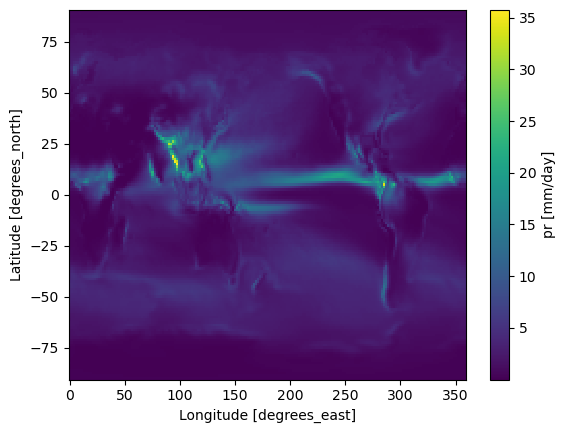

In [7]:
# what the default xarray plot looks like
pr_mean.plot()

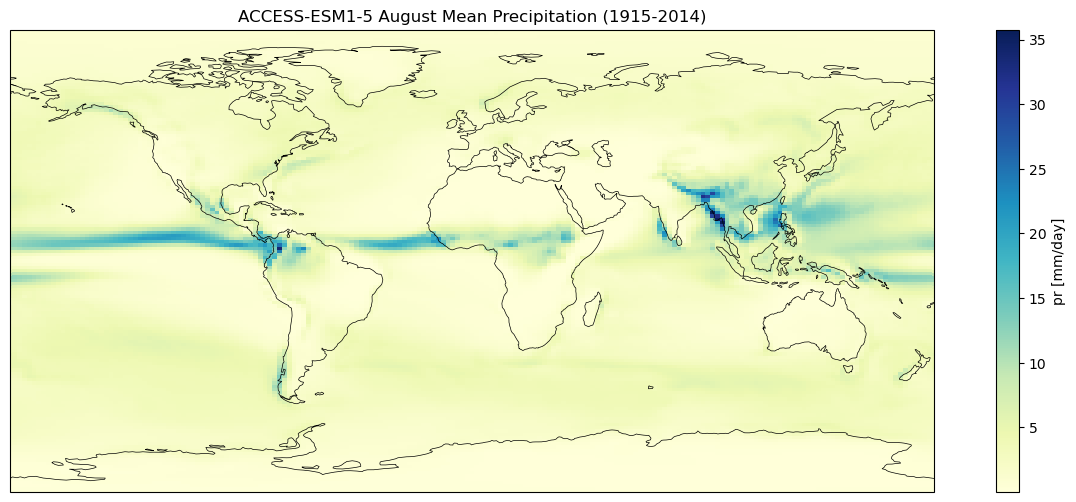

In [8]:
# nicer plot with coastlines

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree()) # using Pseudo Plate Carree from cartopy for display
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor='black') # Add global coastlines
pr_mean.plot(ax=ax,cmap='YlGnBu')
ax.set_title(f'ACCESS-ESM1-5 August Mean Precipitation ({year_start}-{year_end})')
plt.show()

## 3) Plot Baltimore annual mean precip timeseries from 1850-2100

In [9]:
# baltimore coordinates
lat = 39.29
lon = 283.39

# you can read multiple files at once
# files are chunked on disk, so a multifile read will come in as dask arrays
# for small data like this we can just use dask .compute() right up front here
# for bigger data or analyses with more calculations, you'll want to keep your data in dask arrays
# so that you can execute calculations efficiently with parallel/distributed computing

ds = xr.open_mfdataset([h_file,f_file], chunks=-1).sel(lat=lat,lon=lon, method='nearest').compute()
ds

<xarray.Dataset> Size: 181kB
Dimensions:    (time: 3012, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 24kB 1850-01-16T12:00:00 ... 2100-12-16T...
    lat        float64 8B 38.75
    lon        float64 8B 283.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 48kB 1850-01-01 ... 2101-01-01
    lat_bnds   (time, bnds) float64 48kB 38.12 39.38 38.12 ... 39.38 38.12 39.38
    lon_bnds   (time, bnds) float64 48kB 282.2 284.1 282.2 ... 284.1 282.2 284.1
    pr         (time) float32 12kB 4.923e-05 2.868e-05 ... 5.451e-05 5.091e-05
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  21915.0
    creation_date:          2019-11-15T04:32:57Z
    ...                     ...
    variable_id:            pr
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/e1bc1d0d-54d8-4a7f-adae-d3f6324a2366
    license:                CMIP6 model data produced by CSIRO is licensed un...

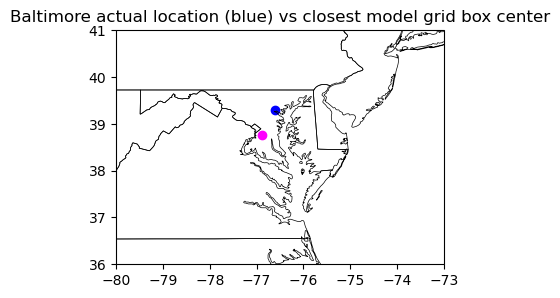

In [10]:
# look at where the closest model grid center is

fig = plt.figure(figsize=(4,4),layout="tight")
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# plot points
ax.scatter(lon, lat, color='blue', transform=ccrs.PlateCarree())
ax.scatter(ds.lon.data, ds.lat.data, color='magenta', transform=ccrs.PlateCarree())

# modifications
ax.set_title('Baltimore actual location (blue) vs closest model grid box center')
ax.set_extent([-80, -73, 36, 41], crs=ccrs.PlateCarree()) # map lat lon extents
ax.add_feature(cfeature.STATES, linewidth=0.5, edgecolor='black') # add state boundaries
ax.set_xticks(ax.get_xticks()) # show x-axis label, ticks, tick labels
ax.set_yticks(ax.get_yticks()) # show y-axis label, ticks, tick labels

plt.show()

In [11]:
# calculate mean annual precip
pr_ann = ds.pr.groupby('time.year').mean('time')

# convert units, update metadata
pr_ann = pr_ann*86400.
pr_ann.attrs['units']='mm/day'

pr_ann

<xarray.DataArray 'pr' (year: 251)> Size: 2kB
array([4.53858023, 4.85159056, 4.32271123, 4.39830552, 5.47972913,
       5.01034391, 4.18590411, 5.24304891, 3.85735561, 4.08807881,
       4.63746227, 4.58968448, 4.20409451, 5.34390521, 4.45375118,
       4.50006329, 5.09804712, 4.8362215 , 3.82197308, 3.87816777,
       4.31917134, 4.114699  , 4.5071965 , 4.90512924, 4.5376995 ,
       4.66960855, 4.54992377, 4.24710657, 4.12265008, 4.14712722,
       4.39132067, 4.40603876, 4.69333604, 5.29946645, 4.0454933 ,
       4.69222617, 4.98794789, 4.2031899 , 4.59991313, 3.74426121,
       4.49687764, 4.88593049, 3.7421408 , 4.27784437, 4.33474093,
       5.42028907, 4.83361169, 5.39261182, 4.19170931, 4.39683041,
       4.45116871, 3.47615326, 3.84632953, 4.01214663, 4.61071321,
       4.01269952, 4.66041276, 3.88086276, 3.17444812, 5.13495473,
       5.39536464, 4.73011195, 4.2900897 , 4.45474223, 4.03220033,
       3.92464804, 4.4209992 , 4.60890461, 3.37529947, 3.79216442,
       4.17336457, 3.85359036, 4.39863995, 4.65469871, 4.05500183,
       4.10091664, 4.62495008, 3.56872781, 4.93242993, 4.43442827,
       5.1140203 , 3.96123599, 4.83191876, 4.93262513, 5.17710051,
       3.99750868, 5.06370625, 3.98717065, 3.73924779, 3.91613528,
       4.39784975, 4.43435189, 4.91328305, 4.42353421, 3.92191439,
       4.28533024, 4.50199511, 4.29528292, 5.12275058, 4.51651613,
...
       4.24548215, 4.20147307, 4.87745953, 4.93560898, 4.1664715 ,
       4.77814152, 5.24071507, 4.57532974, 5.34106563, 5.49831747,
       3.73518424, 3.10319304, 4.63752765, 5.15450207, 4.6079409 ,
       4.58944748, 4.18389057, 5.0064633 , 5.46652889, 4.53402791,
       4.69607566, 4.4747205 , 3.29766178, 6.21589303, 5.4832489 ,
       4.16687384, 3.86369107, 6.10139833, 4.12146886, 5.59822388,
       4.14129562, 4.42766659, 4.32896088, 5.7298403 , 5.82691971,
       4.86282567, 4.20107609, 5.24451082, 4.17829282, 5.17637475,
       5.92695123, 5.37311446, 5.38583631, 5.32951935, 4.84621975,
       3.55138639, 4.48387825, 5.12231713, 4.17038795, 4.39733175,
       4.84075245, 4.79310259, 5.570287  , 5.17367284, 4.7121598 ,
       3.71311856, 5.00850765, 5.17226625, 5.44327791, 4.79328615,
       4.56264404, 4.90794084, 5.39610016, 4.62691459, 4.67377519,
       5.93514245, 5.06165185, 4.27869932, 4.69543916, 4.53296582,
       3.97723935, 5.73096934, 4.68710336, 5.48787257, 4.68271041,
       5.82954932, 4.84077822, 5.37912995, 4.08739705, 4.17493461,
       5.43734038, 5.10288295, 4.44645955, 5.5847967 , 4.89194911,
       4.39074672, 4.48313017, 5.76431633, 4.95701552, 4.45762016,
       5.43218362, 5.70544268, 5.15099393, 4.76365853, 5.04945681,
       6.07747848])
Coordinates:
    lat      float64 8B 38.75
    lon      float64 8B 283.1
  * year     (year) int64 2kB 1850 1851 1852 1853 1854 ... 2097 2098 2099 2100
Attributes:
    units:    mm/day

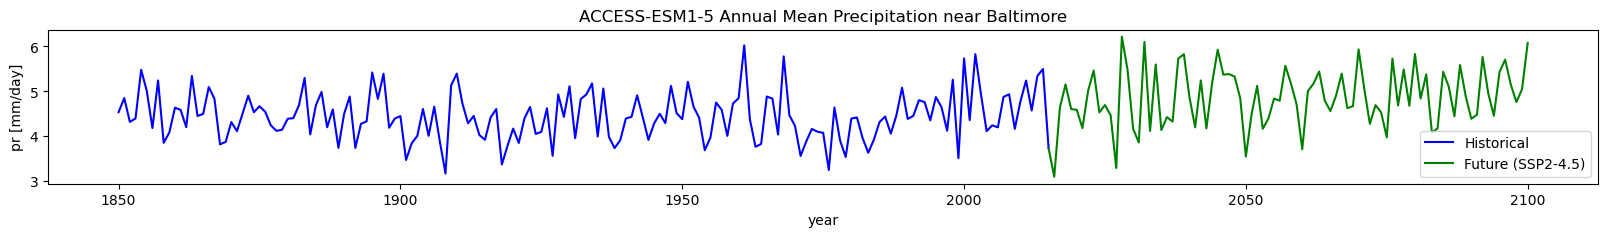

In [12]:
# timeseries plot with indication of which data is historical experiment and which is a scenario

fig, ax = plt.subplots(figsize=(20,2))

# to indicate different CMIP experiments with color, split the data at 2015
# could also just use an axvline at 2015
historical = pr_ann.sel(year=slice(None, 2015))
future = pr_ann.sel(year=slice(2015, None))

historical.plot(ax=ax, color='blue', label='Historical')
future.plot(ax=ax, color='green', label='Future (SSP2-4.5)')

ax.legend()
ax.set_title('ACCESS-ESM1-5 Annual Mean Precipitation near Baltimore')

plt.show()